In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 日本語フォントを設定
font = {'family': 'IPAexGothic'}
mpl.rc('font', **font)

%matplotlib inline

---
# 主成分分析(principal component analysis: PCA) 

以下、*「多変量解析法入門」(ライブラリ新数学大系)より*

主成分分析とは、**<font color="red">相関のある</font>**多数の変数から相関のない少数で全体のばらつきを最もよく表す主成分と呼ばれる変数を合成する多変量解析の一手法。データの次元を削減するために用いられる。

## 適用例
生徒の試験の成績データから「科目や生徒を分類できないか」を考える。以下のデータは10人の生徒に実施した国語・英語・数学・理科の4教科の試験成績です。
<div style="text-align: center;">
    <img src="./imgs/1.主成分分析(PCA)/試験の成績データ.png" width="50%">
</div>

上記の表を各変数の対ごとに散布図を描くと以下の図を得る。
<div style="text-align: center;">
    <img src="./imgs/1.主成分分析(PCA)/各変数間の散布図.png" width="40%">
</div>

各変数間の相関係数はすべて正であり、さらに

 - 「国語と英語」
 - 「数学と理科」

の相関係数は高い値となっている。つまり、**成績データにはなんらかの<font color="red">相関構造</font>があると考えることができる**。


## 解析ストーリー

> 1. 相関係数行列$R$の第1固有値(最大固有値)${ \lambda }_{ 1 }$に対応する固有ベクトルから**第1主成分$z_{1}$**を求める。次に$R$の第2固有値${ \lambda }_{ 2 }$に対応する固有ベクトルから**第2主成分$z_{2}$**を求める。同様にして、**第$k$主成分**を求める。($k=3,4,\cdots, p$)
> 2. それぞれの主成分の**寄与率**および**累積寄与率**を求める。「固有値が1以上」ないしは「累積寄与率が80%を超える」を目安として主成分を選択する。
> 3. **因子負荷量**を求める。固有ベクトルや因子負荷量の値を参考にして、選択した各主成分の意味について考察する。また、因子負荷量を散布図にプロットし、変数の分類を行う。
> 4. **主成分得点**を散布図にプロットし、サンプルの特徴付けや分類を行う。

### 主成分の導出
変数$x_{1}$と$x_{2}$を標準化する。
$$
u_{1} = \frac {x_{1} - \bar {x_{1}} }{ \widehat { \sigma_{1} } }, \quad u_{2} = \frac {x_{2} - \bar {x_{2}}}{ \widehat { \sigma_{2} } }\\
\widehat { \sigma_{i} } = \frac {1}{n-1}\sum _{i=1}^{n}{\left(x_{i} - \bar {x}\right)^{2}}
$$
また、後のため、次のことにも注意しておく。
$$
\sum _{i=1}^{n}{{u_{i1}}^{2}} = \sum _{i=1}^{n}{{u_{i2}}^{2}} = n-1 \quad (9.2)
$$

> 証明<br>
> $$
\sum { \left( \frac { { x }_{ i }-\bar { x }  }{ \widehat { \sigma  }  }  \right) ^{ 2 } } =\frac { \left( n-1 \right) { \widehat { \sigma  }  }^{ 2 } }{ { \widehat { \sigma  }  }^{ 2 } } =n-1
$$

\---------

$$
\sum _{i=1}^{n}{ u_{i1}u_{i2} } = (n-1)r_{x_{1}x_{2}} \quad (9.3)
$$

> 証明<br>
> $$
\widehat { \sigma _{ x_{ 1 }x_{ 2 } } } = \frac { 1 }{ n-1 } \sum { \left( { x }_{ i1 }-\bar { x }  \right) \left( { x }_{ i2 }-\bar { x }  \right)  }より\\
\sum _{ i=1 }^{ n }{ u_{ i1 }u_{ i2 } } =\sum { \left( \frac { { x }_{ i1 }-\bar { { x }_{ 1 } }  }{ \widehat { { \sigma  }_{ 1 } }  }  \right) \left( \frac { { x }_{ i2 }-\bar { { x }_{ 2 } }  }{ \widehat { { \sigma  }_{ 2 } }  }  \right)  } =\frac { \left( n-1 \right) \widehat { \sigma _{ x_{ 1 }x_{ 2 } } }  }{ \widehat { { \sigma  }_{ 1 } } \cdot \widehat { { \sigma  }_{ 2 } }  } =\left( n-1 \right) { r }_{ { x }_{ 1 }{ x }_{ 2 } }
$$

#### 第1主成分$z_{1}$
**第1主成分$z_{1}$**を
$$
z_{1} = a_{1}u_{1} + a_{2}u_{2} \quad (9.4)
$$
とおく。標準化変量$u_{1},u_{2}$の平均値は0なので、第1主成分の平均値も0である。
$$
E\left(z_{1}\right) = a_{1}E\left(u_{1}\right) + a_{2}E\left(u_{2}\right) = a_{1}\cdot0 + a_{2}\cdot0 = 0 \quad (9.5)
$$
目的は、データの情報をできるだけ多く有するように$z_{1}$を定めることである(つまり、係数$a_{1}$と$a_{2}$をデータから定めることである)。

　「$z_{1}$がもとのデータの情報をできるだけ多く有する」ということを「データの全体のばらつきをできるだけ$z_{1}$のばらつきに反映させる」と考える。すなわち、$z_{1}$の分散
$$
V_{z_{1}} = \frac {1}{n-1}\sum _{i=1}^{n}{ \left(z_{i1} - \bar {z_{1}}\right)^{2} } = \frac {1}{n-1}\sum _{i=1}^{n}{ {z_{i1}}^{2} } \quad (9.6)
$$
が最大になるような$a_{1}$と$a_{2}$を求める。(9.2)式と(9.3)式を用いて
$$
V_{ z_{ 1 } }=\frac { 1 }{ n-1 } \sum _{ i=1 }^{ n }{ { z_{ i1 } }^{ 2 } } =\frac { 1 }{ n-1 } \sum { \left( a_{ 1 }u_{ i1 }+a_{ 2 }u_{ i2 } \right) ^{ 2 } } \\ =\frac { 1 }{ n-1 } \left\{ { { a }_{ 1 } }^{ 2 }\sum { { u_{ i1 } }^{ 2 } } +2{ a }_{ 1 }{ a }_{ 2 }\sum { u_{ i1 }u_{ i2 } } +{ { a }_{ 2 } }^{ 2 }\sum { { u_{ i2 } }^{ 2 } }  \right\} \\ ={ { a }_{ 1 } }^{ 2 }+{ { a }_{ 2 } }^{ 2 }+2{ r }_{ { x }_{ 1 }{ x }_{ 1 } }{ a }_{ 1 }{ a }_{ 2 } \quad (9.7)
$$
となるから、$V_{z_{1}}$の値は$a_{1}$と$a_{2}$の値は大きくなればいくらでも大きくなる。そこで、
$$
{a_{1}}^{2} + {a_{2}}^{2} = 1　\quad (9.8)
$$
の制約条件を設けた下で、$V_{z_{1}}$の最大化を考える。


> **制約付き分散最大化**<br>
> $$
\max {V_{z_{1}}} = { { a }_{ 1 } }^{ 2 }+{ { a }_{ 2 } }^{ 2 }+2{ r }_{ { x }_{ 1 }{ x }_{ 1 } }{ a }_{ 1 }{ a }_{ 2 } \\
subject.to.\\
\begin{eqnarray}
{a_{1}}^{2} + {a_{2}}^{2} & = & 1
\end{eqnarray}
$$

制約付きの最大化問題を求めるための定石は**ラグランジュの未定乗数法**である。
$$
f\left(a_{1}, a_{2}, \lambda \right) = {a_{1}}^{2} + {a_{2}}^{2} + 2r_{x_{1}x_{2}}a_{1}a_{2} - \lambda \left( {a_{1}}^{2} + {a_{2}}^{2} - 1 \right)
$$
とおき、$a_{1}, a_{2}$のそれぞれで微分(偏微分)してゼロとおく。すると、次式を得る。
$$
\begin{eqnarray} 2a_{ 1 }+2r_{ x_{ 1 }x_{ 2 } }a_{ 2 }-2\lambda a_{ 1 } & = & 0 \\ 2r_{ x_{ 1 }x_{ 2 } }a_{ 1 }+2a_{ 2 }-2\lambda a_{ 2 } & = & 0 \end{eqnarray}\quad (9.10)
$$
(9.10)式の両辺をそれぞれ2で割って、行列の形に表現すると
$$
\begin{bmatrix} 1 & r_{ x_{ 1 }x_{ 2 } } \\ r_{ x_{ 1 }x_{ 2 } } & 1 \end{bmatrix}\begin{bmatrix} a_{ 1 } \\ a_{ 2 } \end{bmatrix}=\lambda \begin{bmatrix} a_{ 1 } \\ a_{ 2 } \end{bmatrix}\quad (9.11)
$$
となる。行列$R$を
$$
R=\begin{bmatrix} 1 & r_{ x_{ 1 }x_{ 2 } } \\ r_{ x_{ 1 }x_{ 2 } } & 1 \end{bmatrix}
$$
とおく。$R$は**相関係数行列**である。また、$a = \left[a_{1}, a_{2}\right]^{\prime}$とおくと、(9.11)式は
$$
Ra = \lambda a \quad (9.13)
$$
となる。(9.11)式および(9.13)式は、$\lambda$が行列$R$の**固有値**であり、求めるべき$\left[a_{1}, a_{2}\right]$は**固有ベクトル**であることを示している。


ここで、(9.11)式の両辺に左からベクトル$\left[ a_{1}, a_{2} \right]$をかけてみよう。すると
$$
a_{1}^{2} + a_{2}^{2} + 2 r_{ x_{1} x_{2} } a_{1} a_{2} = \lambda \left( a_{1}^{2} + a_{2}^{2} \right)
$$
を得る。この式の左辺は$V_{z_{1}}$であり、右辺は(9.8)式で設けた制約条件により$\lambda$に等しい。すなわち
$$
V_{z_{1}} = \lambda
$$
である。

> 以上より、(9.7)式の$V_{z_{1}}$を最大化することは、「**相関係数行列$R$の固有値問題を解いて、最大固有値$\lambda_{1}$に対応する（長さ１の）固有ベクトル$\boldsymbol {a} = \left[ a_{1}, a_{2} \right]^{T}$を求めれば（つまり、$R \boldsymbol {a} = \lambda_{1} \boldsymbol {a}$）、それが$V_{z_{1}}$の最大値を与える$\left[ a_{1}, a_{2} \right]$であり、$V_{z_{1}}$の最大値は$\lambda_{1}$となる**」という手続きで実行できる。

#### 第2主成分$z_{2}$
第1主成分$z_{1}$だけでデータの情報を説明できないときは、第2主成分$z_{2}$
$$
z_{2} = b_{1} u_{1} + b_{2} u_{2}
$$
を考慮する。

> 第2主成分$z_{2}$は、すでに定まっている第1主成分$z_{1}$に含まれない情報を追加するために導入するので、**$z_{1}$と無相関となるように定める**。

$z_{1}$と$z_{2}$の相関係数$r_{ z_{1} z_{2} } = \sum _{i=1}^{n}{(z_{i1} - \bar {z_{1}}) (z_{i2} - \bar {z_{2}})} / (n-1)$の分子は、

$$
\begin{eqnarray}
\sum {\left( z_{i1} - \bar {z_{1}} \right)\left( z_{i2} - \bar {z_{2}} \right)} & = & \sum { z_{i1} z_{i2} }\\
& = & \sum { \left( a_{1} u_{i1} + a_{2} u_{i2} \right) \left( b_{1} u_{i1} + b_{2} u_{i2} \right) }\\
& = & a_{1}b_{1} \sum { u_{i1}^{2} } + a_{1}b_{2} \sum { u_{i1}u_{i2} } + a_{2} b_{1} \sum { u_{i1} u_{i2} } + a_{2}b_{2} \sum {u_{i2}^{2}}\\
& = & (n - 1) \left\{ a_{1} b_{1} + r_{x_{1}x_{2}} a_{1} b_{2} + r_{x_{1}x_{2}} a_{2} b_{1} + a_{2} b_{2} \right\}\\
& = & (n - 1) \boldsymbol {\mathrm {a}}^{T} R \boldsymbol {\mathrm {b}}\\
& = & (n - 1) \lambda_{1} \boldsymbol {\mathrm {a}}^{T} \boldsymbol {\mathrm {b}} \quad (R \boldsymbol {\mathrm {a}} = \lambda_{1} \boldsymbol {\mathrm {a}}より\boldsymbol {\mathrm {a}}^{T} R = \lambda_{1} \boldsymbol {\mathrm {a}}^{T} [Rは対称行列])\\
\end{eqnarray}
$$

 - $\boldsymbol {\mathrm {b}} = \left[ b_{1}, b_{2} \right]^{T}$
 
となる


これより、$z_{1}$と$z_{2}$の相関係数$r_{z_{1}z_{2}}$が$0$になる条件は、
$$
\boldsymbol {\mathrm {a}}^{T} R \boldsymbol {\mathrm {b}} = 0 \qquad (9.18)
$$
または、
$$
\boldsymbol {\mathrm {a}}^{T} \boldsymbol {\mathrm {b}} = a_{1} b_{1} + a_{2} b_{2} = 0 \qquad (9.19)
$$
の条件と同じである。このことより、第2主成分は、
$$
\begin{eqnarray}
V_{z_{2}} & = & \frac {1}{n - 1} \sum _{i=1}^{n}{\left( z_{i2} - \bar {z_{2}} \right)^{2}} = \frac {1}{n-1} \sum _{i=1}^{n}{z_{i2}^{2}}\\
& = & b_{1}^{2} + b_{2}^{2} + 2 r_{x_{1}x_{2}} b_{1} b_{2}
\end{eqnarray}
$$
を$b_{1}^{2} + b_{2}^{2} = 1$、および、(9.18)式または(9.19)式の条件の下で最大化することより求められる。

> **第2主成分の導出**<br>
> $$
\max {V_{z_{2}}} = { { b }_{ 1 } }^{ 2 }+{ { b }_{ 2 } }^{ 2 }+2{ r }_{ { x }_{ 1 }{ x }_{ 1 } }{ b }_{ 1 }{ b }_{ 2 } \\
subject.to.\\
\begin{eqnarray}
{b_{1}}^{2} + {b_{2}}^{2} & = & 1\\
\boldsymbol {\mathrm {a}}^{T} \boldsymbol {\mathrm {b}} = a_{1} b_{1} + a_{2} b_{2} & = & 0
\end{eqnarray}
$$

**第2主成分の解**<br>

ラグランジュの未定乗数法を用いて解く。

<img src="./imgs/1.主成分分析(PCA)/第2主成分の導出.png" width="50%">

 - (9.26)式は、第2主成分$z_{2}$の係数$\left( b_{1}, b_{2} \right)$も$R$の固有ベクトルであることを示している。
 - $V_{z_{1}}$の最大値が$R$の最大固有値だったことと同じ理由で、$V_{z_{2}}$の最大値も$R$の最大固有値となる。

しかし、$V_{z_{2}}$の最大化においては、$R$の最大固有値$\lambda_{1}$に対応する固有ベクトル$\boldsymbol {\mathrm {b}}$は制約条件(9.19)を満たさない。(なぜなら、固有ベクトル$\boldsymbol {\mathrm {b}}$は、$\boldsymbol {\mathrm {b}} \equiv\boldsymbol {\mathrm {a}}$なので、固有ベクトル$V_{i}$の性質（$V_{i}^{T} V_{i} = 1$）より$\boldsymbol {\mathrm {a}}^{T}\boldsymbol {\mathrm {b}} = \boldsymbol {\mathrm {a}}^{T} \boldsymbol {\mathrm {a}} = 1$となり、制約条件を満たさないため)<br>

そこで、$V_{z_{2}}$の最大値は**$R$の2番目に大きな固有値$\lambda_{2}$となり、第2主成分$z_{2}$の構成には$\lambda_{2}$に対応する（長さ１の）固有ベクトル$\boldsymbol {\mathrm {b}} = \left[ b_{1}, b_{2} \right]^{T}$を用いる。**

### 寄与率および累積寄与率

第$k$主成分の寄与率
$$
\frac { \lambda_{k} }{ \lambda_{1} + \lambda_{2} + \cdots + \lambda_{n} } = \frac {\lambda_{k}}{n}
$$

第$k$主成分までの累積寄与率
$$
\frac {  \lambda_{1} + \lambda_{2} + \cdots + \lambda_{k} }{ \lambda_{1} + \lambda_{2} + \cdots + \lambda_{n} } = \frac {  \lambda_{1} + \lambda_{2} + \cdots + \lambda_{k} }{n}
$$


 - **固有値(=分散)**が**<font color="red">1</font>**以上
または
 - **累積寄与率**が**<font color='red'>0.8(80%)</font>**を超える

という目安で主成分を選択する

### 因子負荷量と主成分の解釈

それぞれの主成分$z_{k}$ともとの変数$x_{i}$との相関係数$r_{z_{k}x_{i}}$を因子負荷量と呼ぶ。


### 主成分得点


---

In [2]:
#データによる検証
HR_DATASET_PATH = "../datasets/HR_comma_sep.csv"

hr_df = pd.read_csv(HR_DATASET_PATH)
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 主成分の導出
[2.5. Decomposing signals in components (matrix factorization problems) — scikit-learn 0.19.0 documentation](http://scikit-learn.org/stable/modules/decomposition.html#)

In [4]:
from sklearn.preprocessing import StandardScaler


left_employee_df = hr_df[hr_df.left == 1]
features = [
    'satisfaction_level',
    'last_evaluation',
    'number_project'
]

# データを標準化する
ss = StandardScaler()
X = ss.fit_transform(left_employee_df[features])

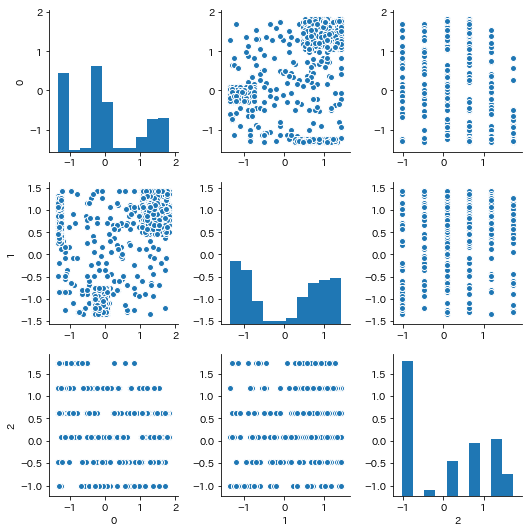

In [14]:
# 相関図
sns.pairplot(pd.DataFrame(X))
plt.show()

In [16]:
pd.DataFrame(X).corr()

,0,1,2
0,1.000000,0.182295,-0.227113
1,0.182295,1.000000,0.804155
2,-0.227113,0.804155,1.000000


ある程度の相関係数があるため、主成分分析による次元圧縮を行います。

In [3]:
from sklearn.decomposition import PCA


DIM = 2

# 主成分分析する
pca = PCA(n_components=DIM) # 第2主成分まで求める。
pca.fit(X)

# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(X)

## 2. 寄与率および累積寄与率

In [4]:
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

各次元の寄与率: [ 0.60182945  0.36403273]
累積寄与率: 0.9658621807609014


第2主成分までの累積寄与率は、**<font color="red">0.96</font>**なので、第2主成分まで考えれば十分である。すなわち、第2主成分までで、5次元データのもつ情報のうち**<font color="red">96</font>**%を説明できる。

## 3. 因子負荷量と主成分の解釈

In [5]:
DataFrame(
    pca.components_, 
    columns=features, 
    index=['第{0}主成分'.format(i) for i in range(1, len(pca.components_) + 1)]
)

,satisfaction_level,last_evaluation,number_project
第1主成分,-0.042025,0.701117,0.711806
第2主成分,0.950738,0.247069,-0.187228


主成分の意味ずけを行う。

**第1主成分**は、`satisfaction_level`以外の因子負荷量の値が0.7くらいで、符号がすべて正であることから**「できる社員指数」**を表すものと解釈できる。

**第2主成分**は、`satisfaction_level`と`last_evaluation`の因子負荷量の値が正で、`number_project`は負なので、**「効率性・充実度」**を表すものと解釈できる。

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


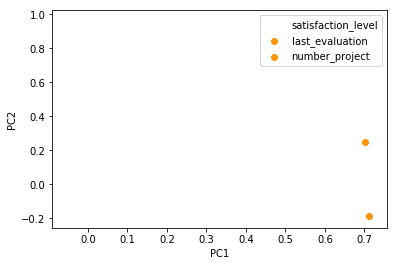

In [6]:
colors = [plt.cm.hsv(0.1 * 1, i) for i in range(len(features))]

for i in range(len(features)):
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.scatter(
        pca.components_[0, i],
        pca.components_[1, i],
        c=colors[i],
        label=features[i]
    )

plt.legend()

「`satisfaction_level`」は離れており、「`number_project`」と「`last_evaluation`」は横軸について対称な位置にある。

## 4. 主成分得点(データの可視化)

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


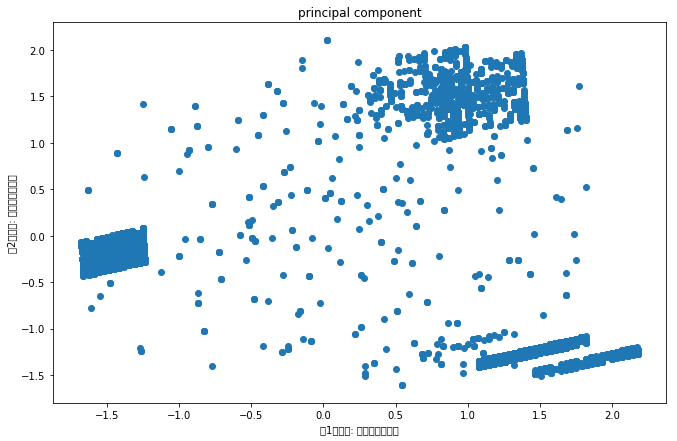

In [7]:
# 主成分をプロットする
plt.figure(figsize=(11,7))
plt.title('principal component')
plt.xlabel('第1主成分: できる社員指数')
plt.ylabel('第2主成分: 効率性・充実度')

plt.scatter(
    transformed[:, 0],
    transformed[:, 1],
)

# グラフを表示する
plt.show()

上記のデータの散布図より、「できる&充実している社員」と「できる&退屈社員」と「できない社員」に別れることがわかる。

## 主成分によるクラスタリング

$n$変数を第$k$主成分までに圧縮し、その寄与率が**<font color="red">0.8</font>**以上なら$n$変数を$k$個の合成変数に圧縮したことになる。これは、クラスタリングするベクトルの次元が多い場合に発生する**球面集中現象**問題を解決する手段となる。

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


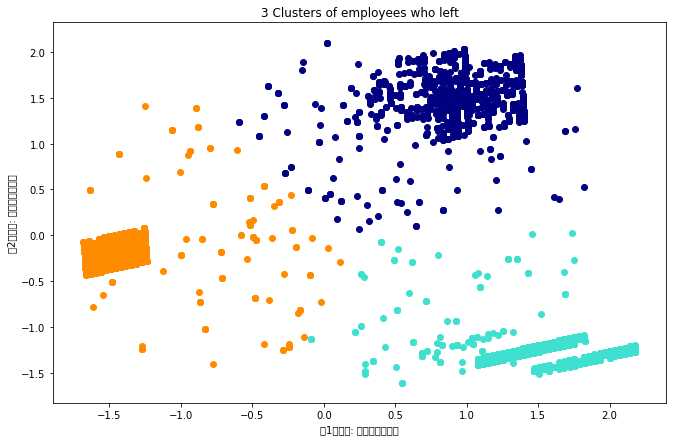

In [8]:
import matplotlib as mpl
from sklearn.cluster import KMeans

N_CLUSTER = 3

# 主成分でクラスタリング
km = KMeans(n_clusters=N_CLUSTER, random_state=0)
km_model = km.fit(transformed)

labels = km_model.labels_

# scater method → http://pythondatascience.plavox.info/matplotlib/%E6%95%A3%E5%B8%83%E5%9B%B3
plt.figure(figsize=(11,7))
plt.xlabel('第1主成分: できる社員指数')
plt.ylabel('第2主成分: 効率性・充実度')
plt.title('3 Clusters of employees who left')

colors = ['navy', 'turquoise', 'darkorange']

for i in range(transformed.shape[0]):
    plt.scatter(
        transformed[i, 0],
        transformed[i, 1],
        color=colors[labels[i]]
    )

plt.show()

---
# 行列とベクトル表記による主成分分析

 - $p$ : 変数の個数,特徴量の数
 - $n$ : サンプルサイズ

$$
\boldsymbol {\mathrm {a}} = \left( \begin{matrix} { a }_{ 1 } \\ { a }_{ 2 } \\ \vdots  \\ { a }_{ p } \end{matrix} \right) ,\quad \boldsymbol {\mathrm {u}}_{i} = \left( \begin{matrix} { u }_{ i1 } \\ { u }_{ i2 } \\ \vdots  \\ { u }_{ ip } \end{matrix} \right) 
$$

$u_{ij}$は、No.$i$のサンプル(特徴ベクトル)の変数$x_{j}$(特徴量)の値を用いて標準化したもの
$$
u_{ij} = \frac {x_{ij} - \bar {x}_{j}}{ {\sigma}_{{x}_{j}} }
$$

第1主成分を
$$
z_{1} = a_{1}u_{1} + a_{2}u_{2} + \cdots + a_{p}u_{p}
$$
と定義すると、No.$i$のサンプルの主成分得点は次のように表現できる。
$$
z_{i1} = a_{1}u_{i1} + a_{2}u_{i2} + \cdots + a_{p}u_{ip}\\
= \boldsymbol{\mathrm {a}}^{T} \boldsymbol {\mathrm {u}}_{i}\\
= \boldsymbol {\mathrm {u}}_{i}^{T} \boldsymbol {\mathrm {a}}
$$

これより$z_{1}$の分散を考える。
$$
V_{z_{1}} = \frac {1}{n - 1} \sum _{i=1}^{n}{\left( z_{i1} - {\bar {z}}_{1} \right)^{2}}\\
= \frac {1}{n - 1} \sum _{i=1}^{n}{ { z_{i1} }^{2}}\\
= \frac {1}{n - 1} \sum _{i=1}^{n}{\left( {\boldsymbol {\mathrm {a}}}^{T} {\boldsymbol {\mathrm {u}}_{i}} \right)\left( {\boldsymbol {\mathrm {u}}_{i}}^{T} {\boldsymbol {\mathrm {a}}} \right)}\\
= {\boldsymbol {\mathrm {a}}}^{T} \left( \frac {1}{n - 1} \sum _{i=1}^{n}{ {\boldsymbol {\mathrm {u}}}_{i} {\boldsymbol {\mathrm {u}}}_{i}^{T} } \right) \boldsymbol {\mathrm {a}}\\
= {\boldsymbol {\mathrm {a}}}^{T} \boldsymbol {\mathrm {R}} \boldsymbol {\mathrm {a}} \quad (9.40)
$$

ここで、$\boldsymbol {\mathrm {R}}$は相関係数行列(共分散行列)である。
$$
{\boldsymbol {\mathrm {u}}}_{i} {\mathrm {u}}_{i}^{T} = \begin{bmatrix} { u }_{ i1 } \\ { u }_{ i2 } \\ \vdots  \\ { u }_{ ip } \end{bmatrix}\left[ \begin{matrix} { u }_{ i1 } & { u }_{ i2 } & \cdots  & { u }_{ ip } \end{matrix} \right] =\begin{bmatrix} { { u }_{ i1 } }^{ 2 } & { u }_{ i1 }{ u }_{ i2 } & \cdots  & { u }_{ i1 }{ u }_{ ip } \\ { u }_{ i2 }{ u }_{ i1 } & { { u }_{ i2 } }^{ 2 } & \cdots  & { u }_{ i2 }{ u }_{ ip } \\ \vdots  & \vdots  & \ddots  & \vdots  \\ { u }_{ ip }{ u }_{ i1 } & { u }_{ ip }{ u }_{ i2 } & \cdots  & { { u }_{ ip } }^{ 2 } \end{bmatrix} \quad (9.41)
$$

上式(9.40)の分散$V_{z_{1}}$の最大化において、制約条件
$$
a_{1}^{2} + a_{2}^{2} + \cdots + a_{p}^{2} = {\boldsymbol {\mathrm {a}}}^{T} \boldsymbol {\mathrm {a}} = 1\quad (9.42)
$$
を設ける。

> $$
\max { V_{z_{1}} = {\boldsymbol {\mathrm {a}}}^{T} \boldsymbol {\mathrm {R}} \boldsymbol {\mathrm {a}} }\\
s.t. \quad = {\boldsymbol {\mathrm {a}}}^{T} \boldsymbol {\mathrm {a}} = 1
$$

ラグランジュの未定乗数法を用いて、
$$
f\left( \boldsymbol {\mathrm {a}}, \lambda \right) = {\boldsymbol {\mathrm {a}}}^{T} \boldsymbol {\mathrm {R}} \boldsymbol {\mathrm {a}} - \lambda \left( {\boldsymbol {\mathrm {a}}}^{T} \boldsymbol {\mathrm {a}} - 1 \right) \quad (9.43)
$$
とおいて、これをベクトル$\boldsymbol {\mathrm {a}}$により微分して(サイエンス社「多変量解析法入門 3.3節」を参照)0とおく。
$$
\frac {\partial f}{\partial \boldsymbol {\mathrm {a}}} = 2 \boldsymbol {\mathrm {R}} \boldsymbol {\mathrm {a}} - 2 \lambda \boldsymbol {\mathrm {a}} = 0 \quad (9.44)
$$

これより、
$$
\boldsymbol {\mathrm {R}} \boldsymbol {\mathrm {a}} = \lambda \boldsymbol {\mathrm {a}} \quad (9.45)
$$
を得る。このことから、第1主成分の係数は、(9.45)式の固有値問題をといて、最大固有値に対応する(長さ1の、ノムル1の)固有ベクトルを求めればよいことがわかる。

(9.45)式に左から$\boldsymbol {\mathrm {a}}^{T}$をかければ、(9.42)式を用いることにより、
$$
{\boldsymbol {\mathrm {}a}}^{T} \boldsymbol {\mathrm {R}} \boldsymbol {\mathrm {a}} = \lambda {\boldsymbol {\mathrm {a}}}^{T} \boldsymbol {\mathrm {a}} = \lambda
$$
を得る。また、式(9.40)より
$$
V_{z_{1}} = {\boldsymbol {\mathrm {}a}}^{T} \boldsymbol {\mathrm {R}} \boldsymbol {\mathrm {a}} = \lambda
$$
となる。

次に、第2主成分の導出を考える。